## Sentiment Analysis

Sentiment analysis can be done in different approaches. In this project we are going to use rule based approach.

### Rule-based Approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
# pd.set_option("display.max_rows",2000)

In [4]:
df.head(10)

,Review
0,We flew on probably the first A380 the airlin...
1,"Service was ok, pretty good on my aisle and ..."
2,12th February 2024 From check in to get onboa...
3,"Remarkable experience. Great tasting food, l..."
4,My last travel in January 2024 the food qual...
5,"What a trip, highest level possible, probabl..."
6,No complaints about the service or products ...
7,"When I arrived at my departing airport, Balt..."
8,Have been using Qatar Airways for years and ...
9,I flew Qatar Airways during the COVID pandem...


### Step1: Cleaning Text

In [5]:
import re

In [6]:
def clean(text):#defining function for cleaning the text.
    text = re.sub('[^A-Za-z]+',' ',str(text)) #removing all special characters and numericals in text.
    return text    

In [7]:
df["cleaned Reviews"] = df["Review"].apply(clean)

In [8]:
df.isnull().sum()

Review             379
cleaned Reviews      0
dtype: int64

In [9]:
df = df.dropna()

### Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. 
It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### Step3: POS Tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### Step4: Stopwords Removal

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

### Step5: Obtaining Stem words

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /home/uday/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/uday/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/uday/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/uday/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/uday/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
#pos tagger dictionary

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

In [14]:
def token_stop_pos(text):

    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))

    return newlist 

In [15]:

print("processing..")
df['POS tagged'] = df['cleaned Reviews'].apply(token_stop_pos)
df.head()

processing..


,Review,cleaned Reviews,POS tagged
0,We flew on probably the first A380 the airlin...,We flew on probably the first A the airline r...,"[(flew, v), (probably, r), (first, a), (airlin..."
1,"Service was ok, pretty good on my aisle and ...",Service was ok pretty good on my aisle and ex...,"[(Service, n), (ok, a), (pretty, r), (good, a)..."
2,12th February 2024 From check in to get onboa...,th February From check in to get onboard rema...,"[(th, a), (February, n), (check, n), (get, v),..."
3,"Remarkable experience. Great tasting food, l...",Remarkable experience Great tasting food leg ...,"[(Remarkable, a), (experience, n), (Great, n),..."
4,My last travel in January 2024 the food qual...,My last travel in January the food quality an...,"[(last, a), (travel, n), (January, n), (food, ..."


#### Lemmatization

In [16]:
from nltk.stem import WordNetLemmatizer
# wnl = WordNetLemmatizer

In [17]:
wordnet_lemmatizer = WordNetLemmatizer()
def Lemmatize(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev


In [18]:
df["Lemma"] = df["POS tagged"].apply(Lemmatize)
df.head()

,Review,cleaned Reviews,POS tagged,Lemma
0,We flew on probably the first A380 the airlin...,We flew on probably the first A the airline r...,"[(flew, v), (probably, r), (first, a), (airlin...",fly probably first airline receive keep good...
1,"Service was ok, pretty good on my aisle and ...",Service was ok pretty good on my aisle and ex...,"[(Service, n), (ok, a), (pretty, r), (good, a)...",Service ok pretty good aisle extremely slow ...
2,12th February 2024 From check in to get onboa...,th February From check in to get onboard rema...,"[(th, a), (February, n), (check, n), (get, v),...",th February check get onboard remarkable exp...
3,"Remarkable experience. Great tasting food, l...",Remarkable experience Great tasting food leg ...,"[(Remarkable, a), (experience, n), (Great, n),...",Remarkable experience Great taste food leg s...
4,My last travel in January 2024 the food qual...,My last travel in January the food quality an...,"[(last, a), (travel, n), (January, n), (food, ...",last travel January food quality presentatio...


In [19]:
df[["Review","Lemma"]].head(10)

,Review,Lemma
0,We flew on probably the first A380 the airlin...,fly probably first airline receive keep good...
1,"Service was ok, pretty good on my aisle and ...",Service ok pretty good aisle extremely slow ...
2,12th February 2024 From check in to get onboa...,th February check get onboard remarkable exp...
3,"Remarkable experience. Great tasting food, l...",Remarkable experience Great taste food leg s...
4,My last travel in January 2024 the food qual...,last travel January food quality presentatio...
5,"What a trip, highest level possible, probabl...",trip high level possible probably Lounge Fra...
6,No complaints about the service or products ...,complaint service product onboard However lo...
7,"When I arrived at my departing airport, Balt...",arrive depart airport Baltimore Washington f...
8,Have been using Qatar Airways for years and ...,use Qatar Airways year never let us check de...
9,I flew Qatar Airways during the COVID pandem...,fly Qatar Airways COVID pandemic wonderful a...


### VaderSentiment Analysis

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [21]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Review,cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,We flew on probably the first A380 the airlin...,We flew on probably the first A the airline r...,"[(flew, v), (probably, r), (first, a), (airlin...",fly probably first airline receive keep good...,0.9584,Positive
1,"Service was ok, pretty good on my aisle and ...",Service was ok pretty good on my aisle and ex...,"[(Service, n), (ok, a), (pretty, r), (good, a)...",Service ok pretty good aisle extremely slow ...,0.8807,Positive
2,12th February 2024 From check in to get onboa...,th February From check in to get onboard rema...,"[(th, a), (February, n), (check, n), (get, v),...",th February check get onboard remarkable exp...,0.9903,Positive
3,"Remarkable experience. Great tasting food, l...",Remarkable experience Great tasting food leg ...,"[(Remarkable, a), (experience, n), (Great, n),...",Remarkable experience Great taste food leg s...,0.9557,Positive
4,My last travel in January 2024 the food qual...,My last travel in January the food quality an...,"[(last, a), (travel, n), (January, n), (food, ...",last travel January food quality presentatio...,0.9442,Positive


In [22]:
vader_counts = df["Analysis"].value_counts()
vader_counts

Analysis
Positive    1239
Negative     270
Neutral      112
Name: count, dtype: int64

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
mylabels = ["Positive","Negative","Neutral"]

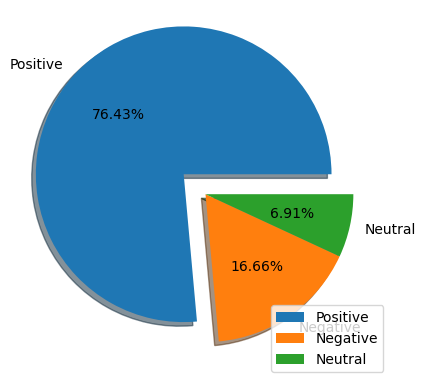

In [25]:
plt.pie(vader_counts,labels=mylabels,autopct='%.2f%%',explode=[0.2,0,0],shadow=True)
plt.legend()
plt.show()

In [26]:
df1 = df.loc[df["Sentiment"]>=0.5]
df1.head()

,Review,cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,We flew on probably the first A380 the airlin...,We flew on probably the first A the airline r...,"[(flew, v), (probably, r), (first, a), (airlin...",fly probably first airline receive keep good...,0.9584,Positive
1,"Service was ok, pretty good on my aisle and ...",Service was ok pretty good on my aisle and ex...,"[(Service, n), (ok, a), (pretty, r), (good, a)...",Service ok pretty good aisle extremely slow ...,0.8807,Positive
2,12th February 2024 From check in to get onboa...,th February From check in to get onboard rema...,"[(th, a), (February, n), (check, n), (get, v),...",th February check get onboard remarkable exp...,0.9903,Positive
3,"Remarkable experience. Great tasting food, l...",Remarkable experience Great tasting food leg ...,"[(Remarkable, a), (experience, n), (Great, n),...",Remarkable experience Great taste food leg s...,0.9557,Positive
4,My last travel in January 2024 the food qual...,My last travel in January the food quality an...,"[(last, a), (travel, n), (January, n), (food, ...",last travel January food quality presentatio...,0.9442,Positive


In [27]:
df2 = df.loc[df["Sentiment"]<0.5]
df2.head()

,Review,cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
6,No complaints about the service or products ...,No complaints about the service or products o...,"[(complaints, n), (service, n), (products, n),...",complaint service product onboard However lo...,-0.8360,Negative
7,"When I arrived at my departing airport, Balt...",When I arrived at my departing airport Baltim...,"[(arrived, v), (departing, v), (airport, n), (...",arrive depart airport Baltimore Washington f...,-0.8860,Negative
11,I had a recent flight with Qatar Airways from...,I had a recent flight with Qatar Airways from...,"[(recent, a), (flight, n), (Qatar, n), (Airway...",recent flight Qatar Airways Ahmedabad Detroi...,-0.2500,Negative
12,When my flight with Qatar was delayed throug...,When my flight with Qatar was delayed through...,"[(flight, n), (Qatar, n), (delayed, v), (fault...",flight Qatar delay fault Qatar fog bound Geo...,-0.8834,Negative
16,"Upon arriving in Doha, a 30-minute bus ride ...",Upon arriving in Doha a minute bus ride from ...,"[(Upon, None), (arriving, v), (Doha, n), (minu...",Upon arrive Doha minute bus ride plane termi...,-0.2349,Negative


In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [30]:
def show_wordcloud(data):
    wordcloud = WordCloud(background_color = 'cyan',
                         stopwords = stopwords,
                         max_words = 100,
                         max_font_size= 30,
                         scale = 3,
                         random_state = 1 )
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1,figsize=(12,12))
    plt.axis ('off')
    plt.imshow(wordcloud)
    plt.show()

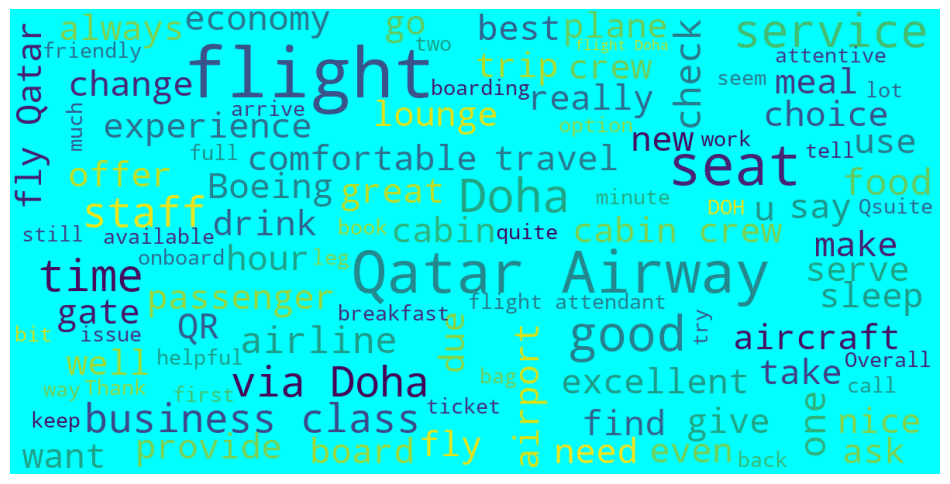

In [31]:
data_df1 = []
for word in df1.Lemma:
    if len(word)>3:
        data_df1.append(word)
        
show_wordcloud(data_df1)

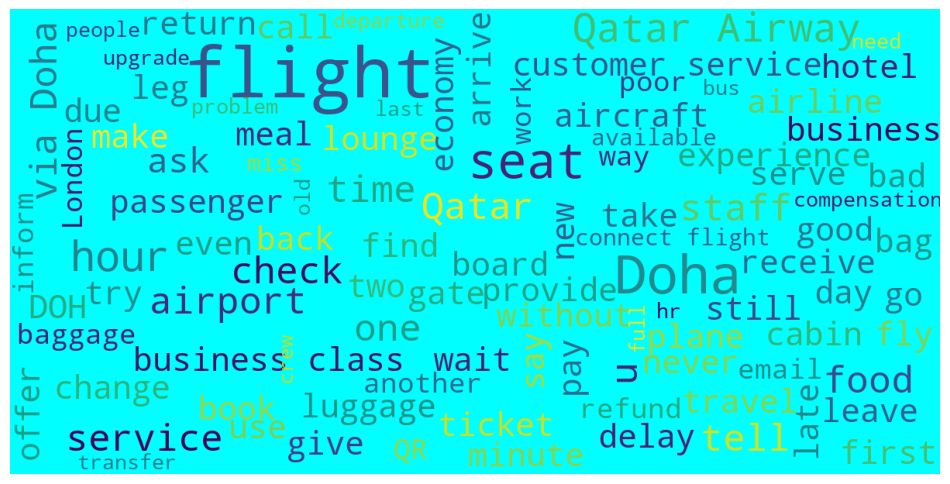

In [32]:
data_df2 = []
for word in df2.Lemma:
    if len(word)>3:
        data_df2.append(word)
        
show_wordcloud(data_df2)